In [1]:
import os
import json
from typing import Dict, List, Optional, Union, cast
import requests
import pandas as pd
from env import github_token, github_username

import prepare
import acquire
import explore
#import model

import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filter="ignore"

from bs4 import BeautifulSoup

train---> (89, 3)
validate---> (39, 3)
test---> (32, 3)


<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px"></hr>

# `Acquire Data`
## Using  [Acquire.py](https://github.com/bert-jason-ray/nlp-group-project/blob/main/acquire.py) file to bring in new dataframe.`

In [2]:
# define the acquired file as new data frame
df = acquire.get_github_data()
df

,repo,language,readme_contents
0,jagrosh/MusicBot,Java,"<img align=""right"" src=""https://i.imgur.com/zr..."
1,Just-Some-Bots/MusicBot,Python,# MusicBot\n\n[![GitHub stars](https://img.shi...
2,SudhanPlayz/Discord-MusicBot,JavaScript,"<h1 align=""center""><img src=""./assets/logo.gif..."
3,IVETRI/SongPlayRoBot,Python,# Check Our New Bot Repo & Video :\n\n[Video](...
4,Splamy/TS3AudioBot,C#,# TS3AudioBot\n\nThis is a open-source TeamSpe...
...,...,...,...
195,Davidremo02/LazyMusicbot,NaN,"<h2 align=""centre"">Telegram Group Music Player..."
196,MrRizoel/RiZoeLXMusic,Python,"<h2 align=""centre"">ℝ𝚒ℤ𝚘𝚎𝕃𝕏𝕄𝚞𝚜𝚒𝚌 🎵</h2>\n\n### ..."
197,noirscape/MusicBot-2,Python,# Dynamic cog bot template\n\nThis is a bot te...
198,bhkvlldu/MusicBot,Python,# ⌯ Source zoro ˹♻️˼⁩\n\n• I am a developer in...


<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px"></hr>

# `Preapare Data`

## Using  [Prepare.py](https://github.com/bert-jason-ray/nlp-group-project/blob/main/prepare.py) to summon Clean, Stemmed, and Lemmatized data.

In [3]:
df = prepare.prep_github_data(df,column = 'readme_contents', extra_words=[], exclude_words=['musicbot'])

In [4]:
#df = df.drop(columns = ['readme_contents', 'stemmed','clean'])
#df = df.dropna()

<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px"></hr>

# `Splitting Data`

In [5]:
train, validate, test = prepare.split_github_data(df)

train---> (89, 6)
validate---> (39, 6)
test---> (32, 6)


<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px"></hr>

# `EXPLORE`
**In this section we will be exploring our data using `bigrams`(2 word clusters) and `trigrams`(3 word clusters) across the top 5 different languages used for musicbot programs. We will be working to explore the data and find ways to answer the following questions:**
- `What are the most common words in READMEs?`
- `Does the length of the README vary by programming language?`
- `Do different programming languages use a different number of unique words?`
- `Are there any words that uniquely identify a programming language?`


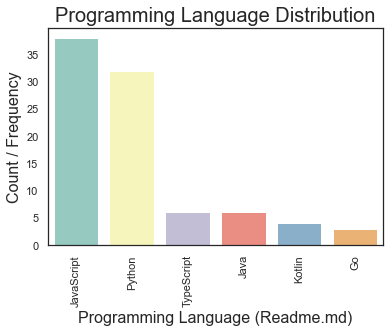

In [6]:
explore.programing_language_distribution()

### Takeaways:
 - **JavaScript & Python seem to dominate, while Java & TypeScript and all others seem to be at the 10 range.**

<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px"></hr>

In [7]:
# Set up word counts dataframe
all_text = ' '.join(train.lemmatized)
javascript_text = ' '.join(train[train.language == 'JavaScript'].lemmatized)
python_text = ' '.join(train[train.language == 'Python'].lemmatized)
typescript_text = ' '.join(train[train.language == 'TypeScript'].lemmatized)
java_text = ' '.join(train[train.language == 'Java'].lemmatized)
go_text = ' '.join(train[train.language == 'Go'].lemmatized)
kotlin_text = ' '.join(train[train.language == 'Kotlin'].lemmatized)
all_freq = pd.Series(str(all_text).split()).value_counts()
javascript_freq = pd.Series(str(javascript_text).split()).value_counts()
python_freq = pd.Series(str(python_text).split()).value_counts()
typeScript_freq = pd.Series(str(typescript_text).split()).value_counts()
java_freq = pd.Series(str(java_text).split()).value_counts()
go_freq = pd.Series(str(go_text).split()).value_counts()
kotlin_freq = pd.Series(str(kotlin_text).split()).value_counts()
word_counts = pd.concat([all_freq, javascript_freq, python_freq, typeScript_freq,java_freq, go_freq, kotlin_freq], sort=True, axis=1)
word_counts.columns = ['all', 'JavaScript', 'python', 'typescript','java', 'go', 'kotlin']
word_counts = word_counts.fillna(0).apply(lambda s: s.astype(int))
top_30 = word_counts.sort_values(by='all', ascending=False).head(30)

# `What are the most common words in READMEs?`

In [8]:
top_30

,all,JavaScript,python,typescript,java,go,kotlin
music,392,54,288,13,17,11,9
song,158,56,72,5,10,3,12
text,151,6,142,1,1,0,1
option,146,5,140,0,0,0,1
command,130,55,36,13,13,2,11
spotify,124,2,101,3,1,0,17
play,123,48,57,3,3,3,9
discord,119,58,23,12,19,5,2
file,110,19,73,4,6,6,2
youtube,107,34,39,3,17,5,9


<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px"></hr>

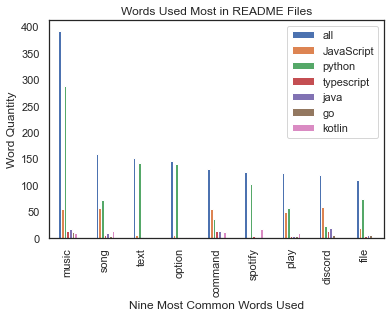

In [9]:
explore.word_distribution_vizual()

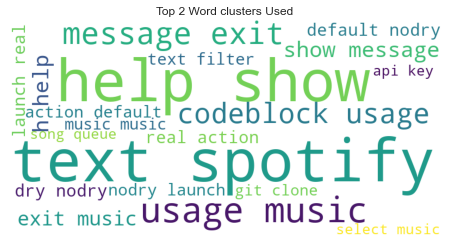

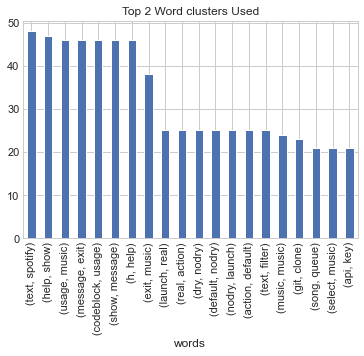

In [10]:
explore.all_words_bigram_wordcloud()
explore.all_words_bigram_barplot()

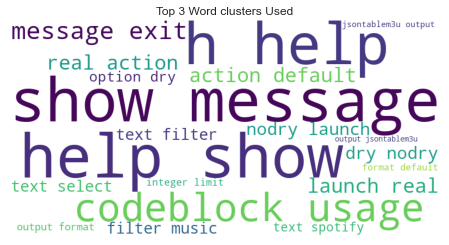

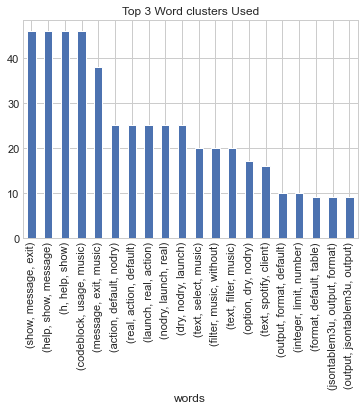

In [11]:
explore.all_words_trigram_wordcloud()
explore.all_words_trigram_barplot()

# `Takeaways:`
`single words:`
-
-
`bigram(2 word clusters):`
-
-


<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px"></hr>

# `Do words in READMEs vary based on programming languages used?`

**Python**

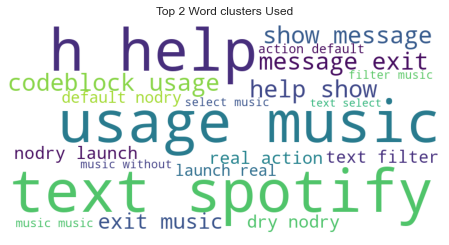

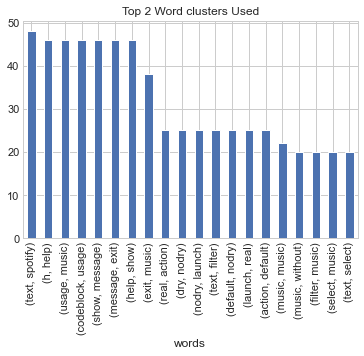

In [12]:
explore.python_bigram_wordcloud()
explore.python_bigram_barplot()

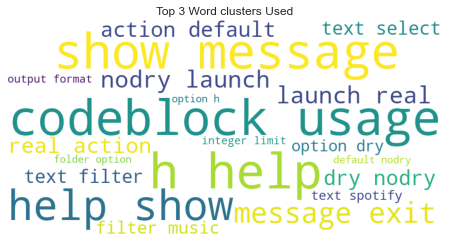

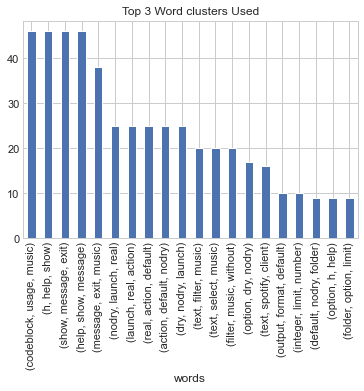

In [13]:
explore.python_trigram_wordcloud()
explore.python_trigram_barplot()

***
**JavaScript**
- Bigrams

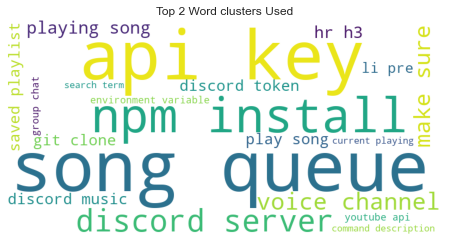

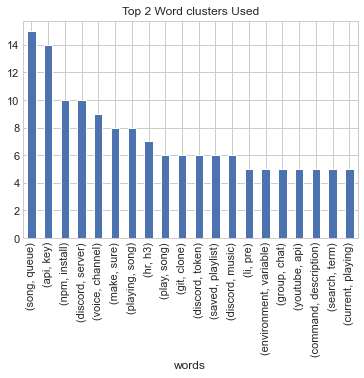

In [14]:
explore.javascript_bigram_wordcloud()
explore.javascript_bigram_barplot()

**JavaScript**
- trigrams

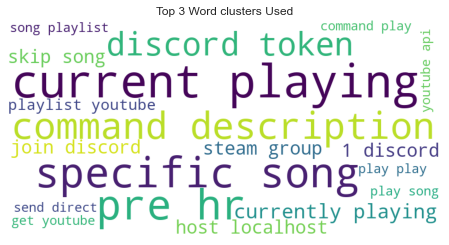

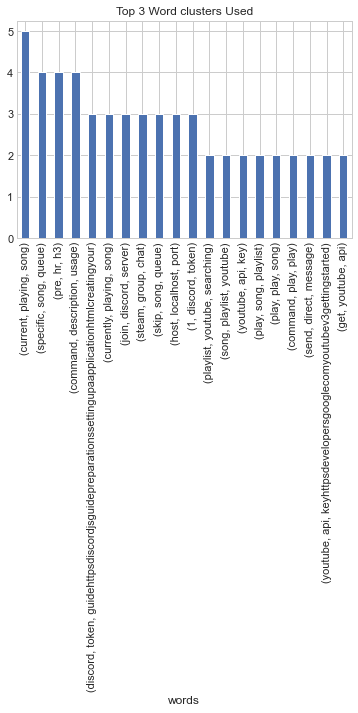

In [15]:
explore.javascript_trigram_wordcloud()
explore.javascript_trigram_barplot()

***
**TypeScript**
- Bigrams

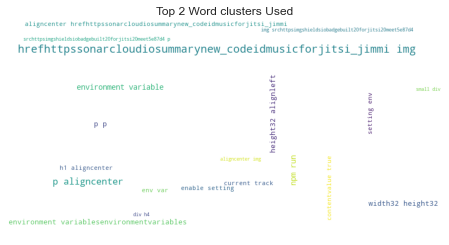

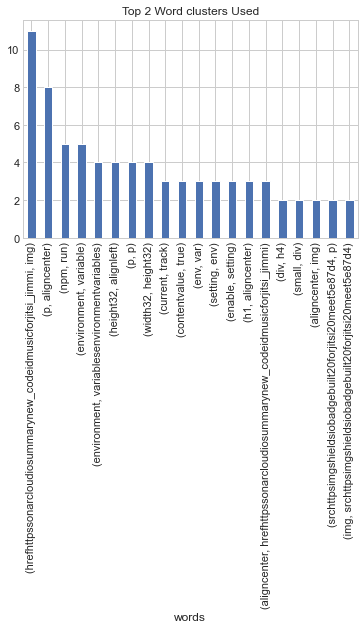

In [16]:
explore.typescript_bigram_wordcloud()
explore.typescript_bigram_barplot()

**TypeScript**
- trigrams

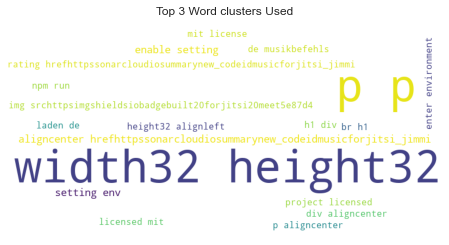

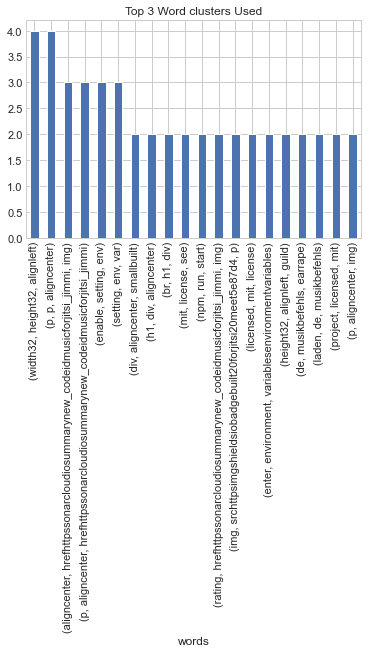

In [17]:
explore.typescript_trigram_wordcloud()
explore.typewscript_trigram_barplot()

***
**Java**
- Bigrams

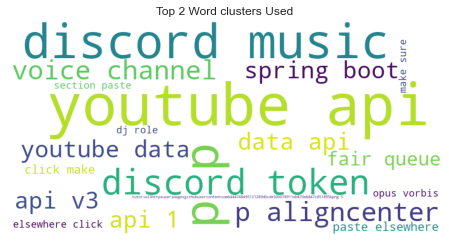

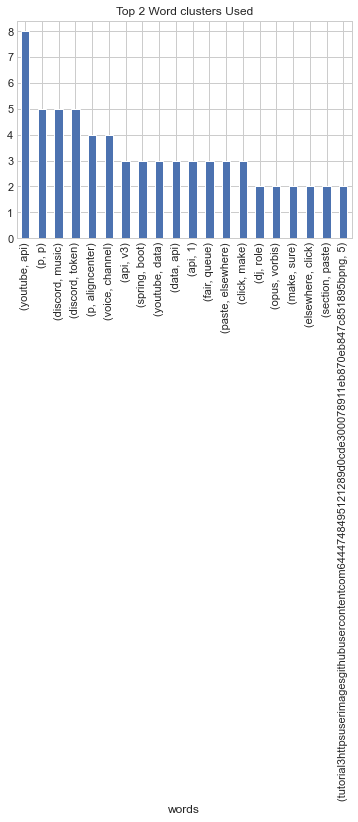

In [18]:
explore.java_bigram_wordcloud()
explore.java_bigram_barplot()

**Java**
- Trigrams

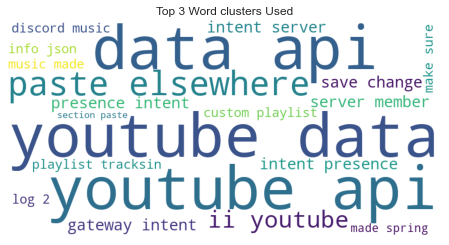

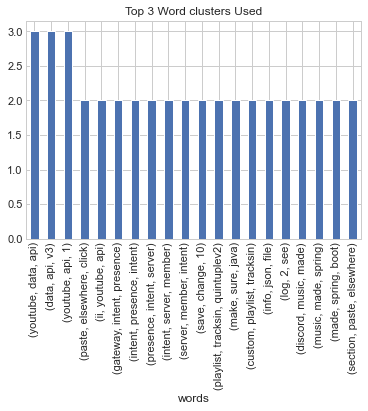

In [19]:
explore.java_trigram_wordcloud()
explore.java_trigram_barplot()    

***
**Go**
- Bigrams

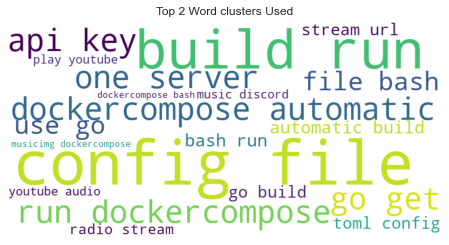

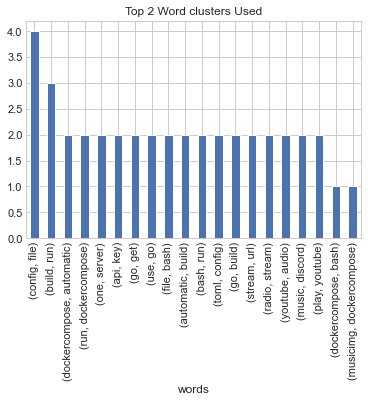

In [20]:
explore.go_bigram_wordcloud()
explore.go_bigram_barplot()

**Go**
- Trigrams

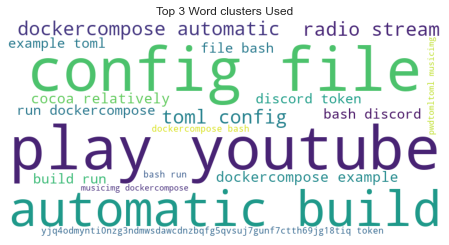

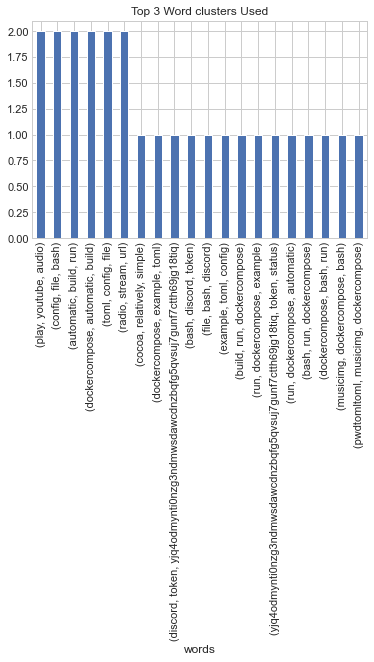

In [21]:
explore.go_trigram_wordcloud()
explore.go_trigram_barplot()

***
**UNIQUE VALUE COUNTS**

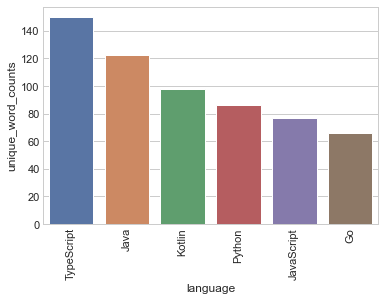

In [22]:
explore.unique_word_count()

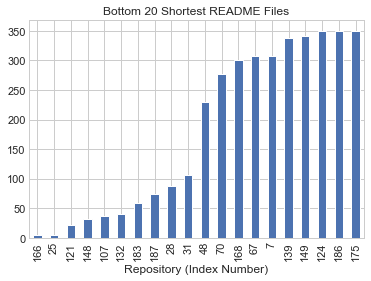

In [23]:
explore.min_words_in_read_mes()

<hr style="border-top: 10px groove lightblue; margin-top: 1px; margin-bottom: 1px"></hr>

# `Do lenght of words vary in READMEs based on programming languages?`

***